In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from matplotlib.animation import FuncAnimation
from IPython import display
%matplotlib inline
# %matplotlib qt

In [2]:
#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (1/(np.sqrt (2*np.pi)*sd)) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

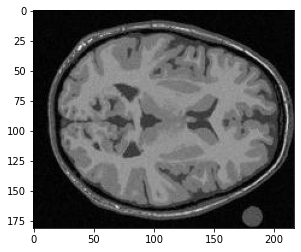

In [3]:
I = cv2.imread('subject05_80.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
nf,nc=I.shape
plt.imshow(I,cmap='gray')

In [4]:
std=3
min_level=np.amin(I)+std
max_level=np.amax(I)-std
nm=4 #number of models
phi=np.ones([nm,])/nm
med=np.linspace(30,150,nm)
# med=random.sample(range(0, 255), nm) #initializing means randomly
# med=np.linspace(min_level,max_level,nm)
std= np.ones([nm,])*std #initializing standar desviation with 2
print(med,std)

[ 30.  70. 110. 150.] [3. 3. 3. 3.]


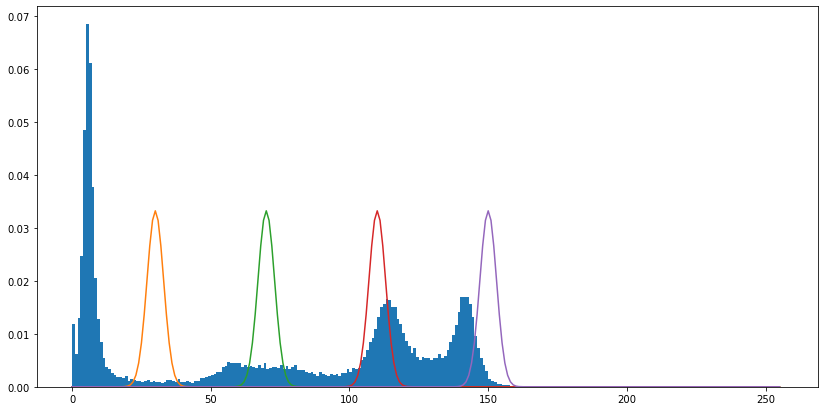

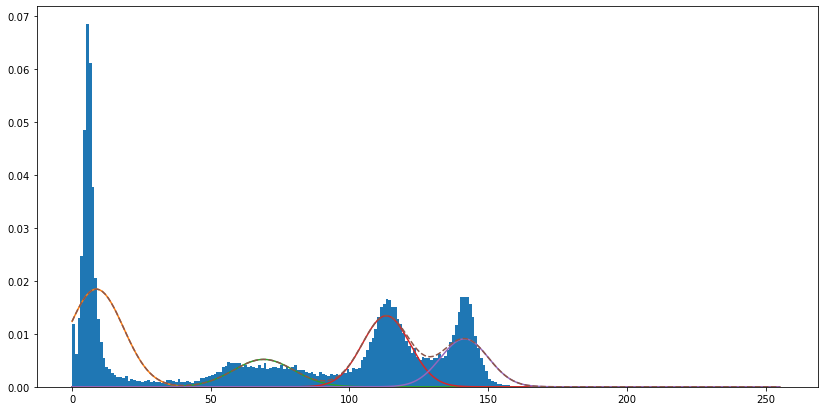

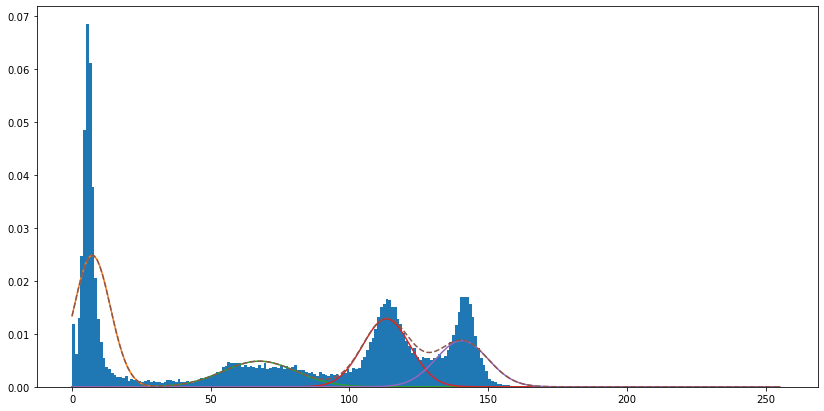

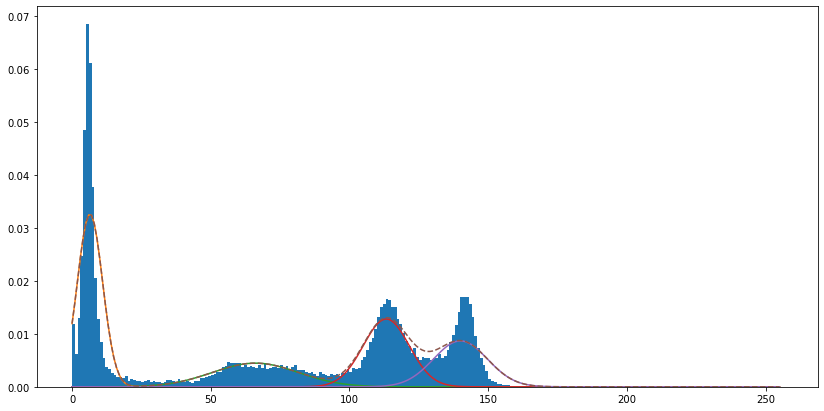

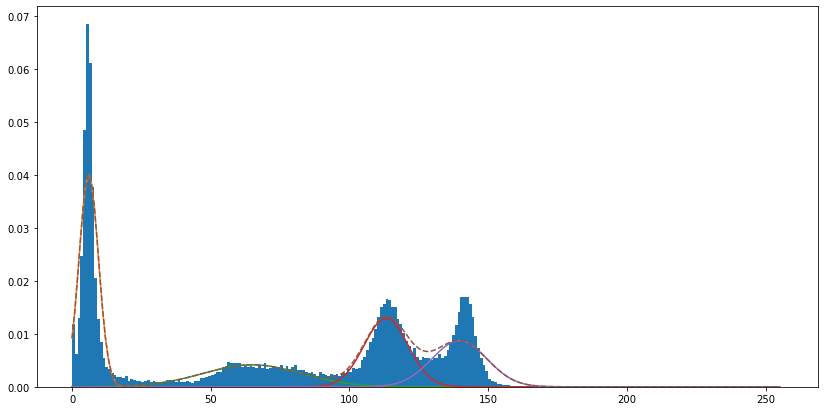

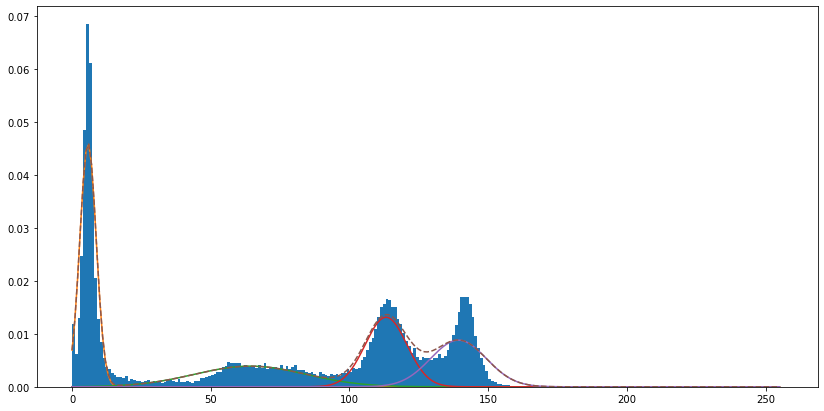

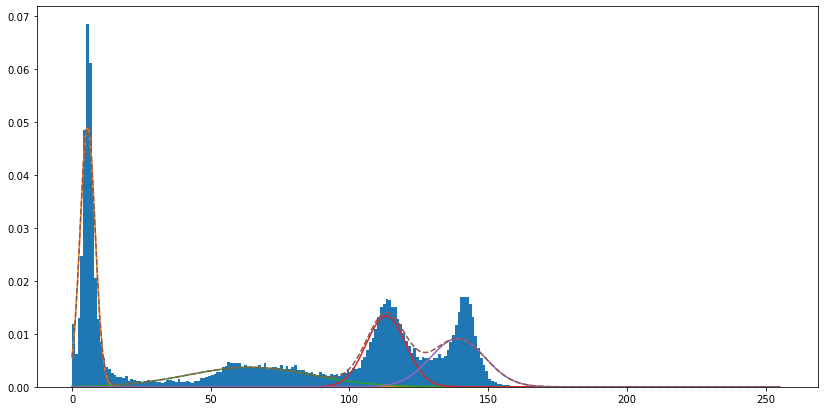

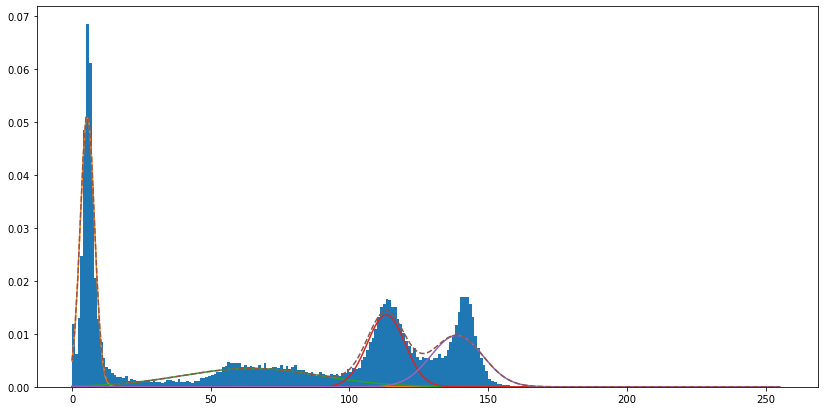

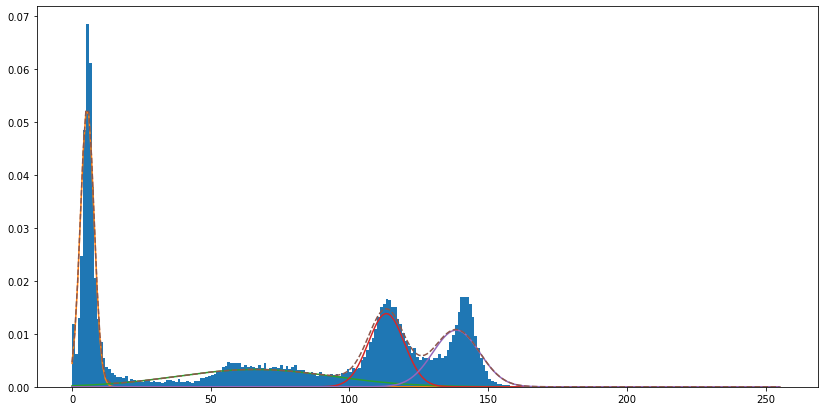

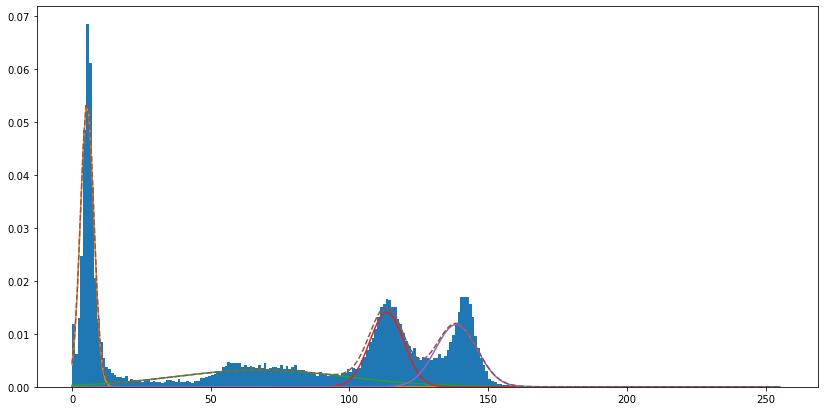

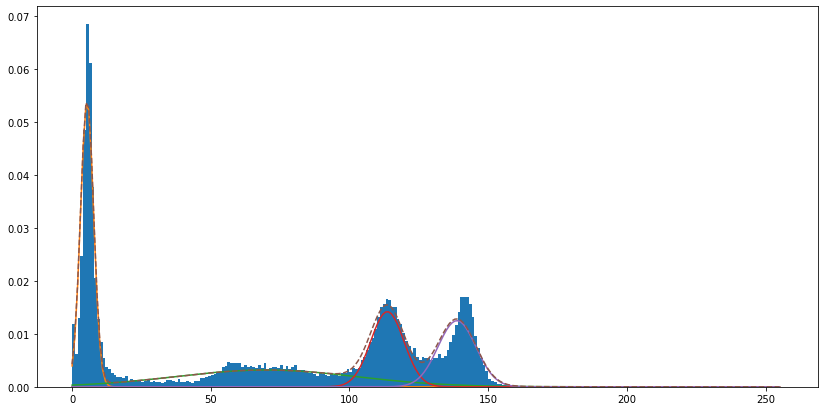

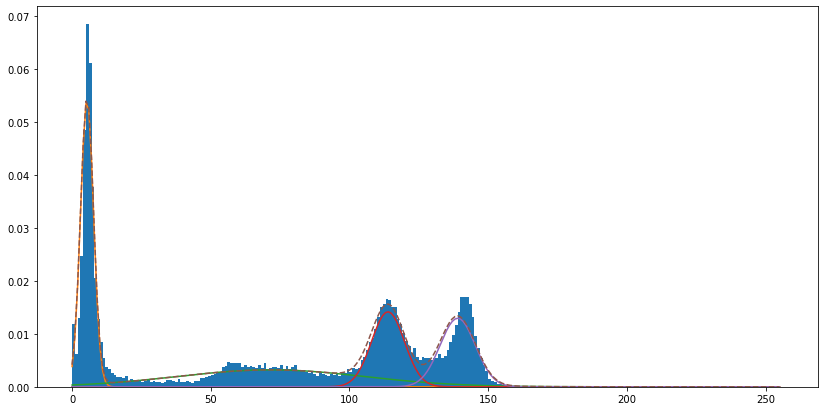

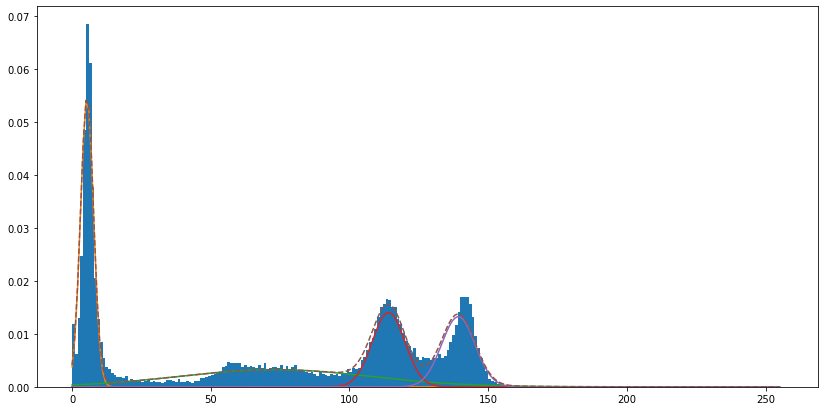

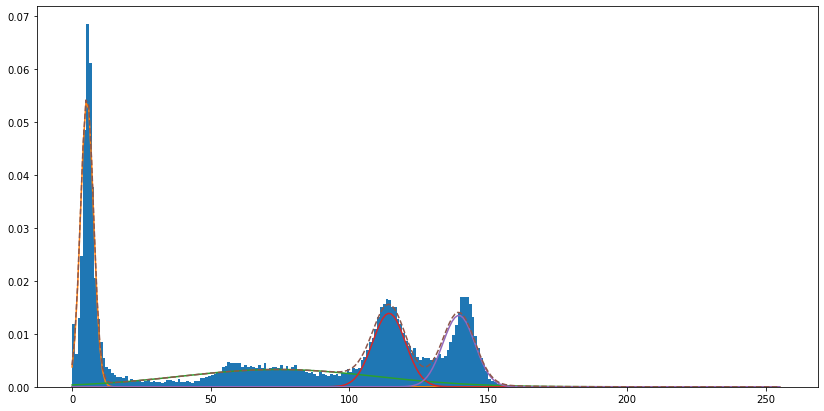

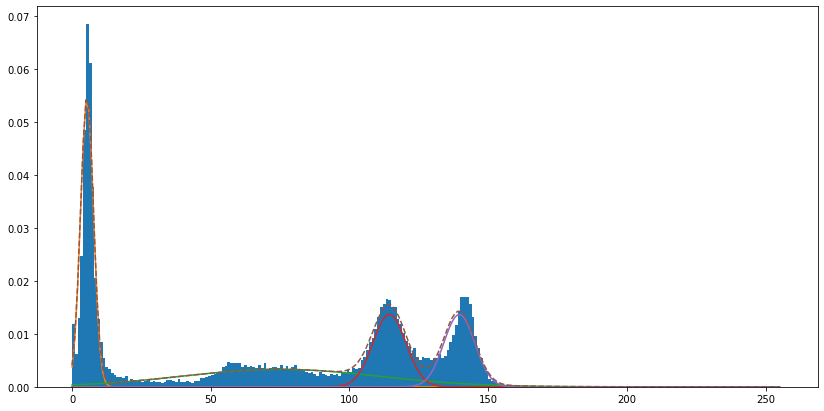

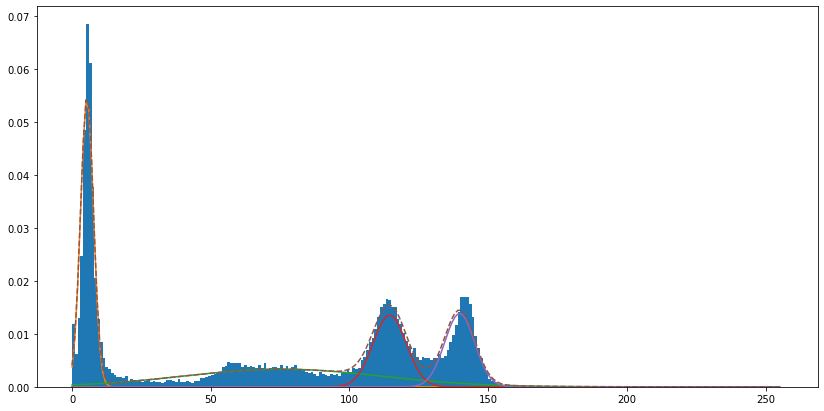

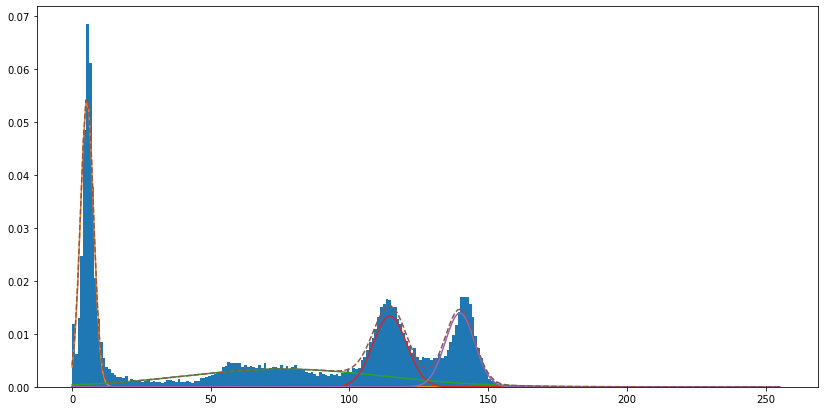

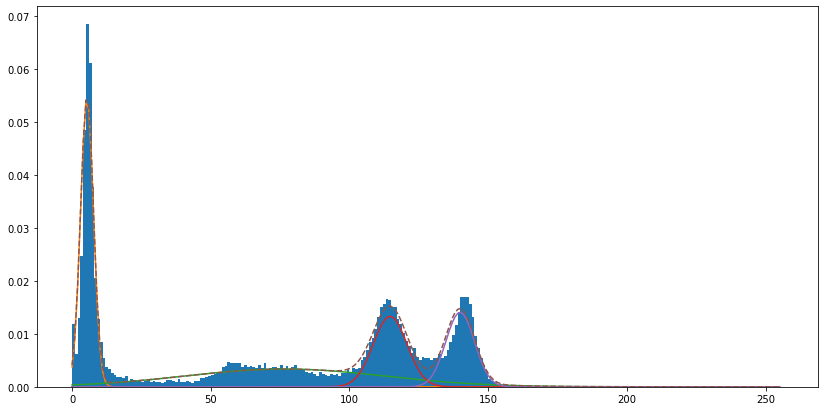

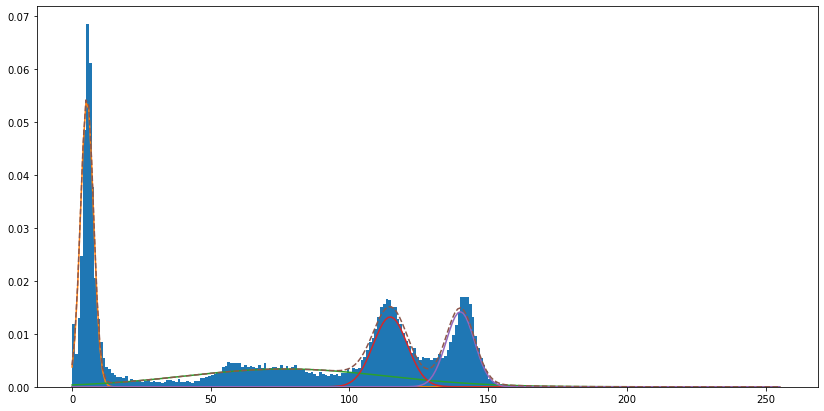

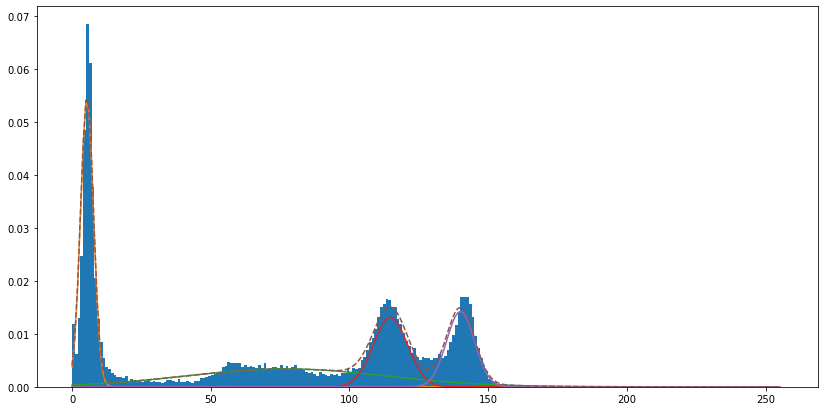

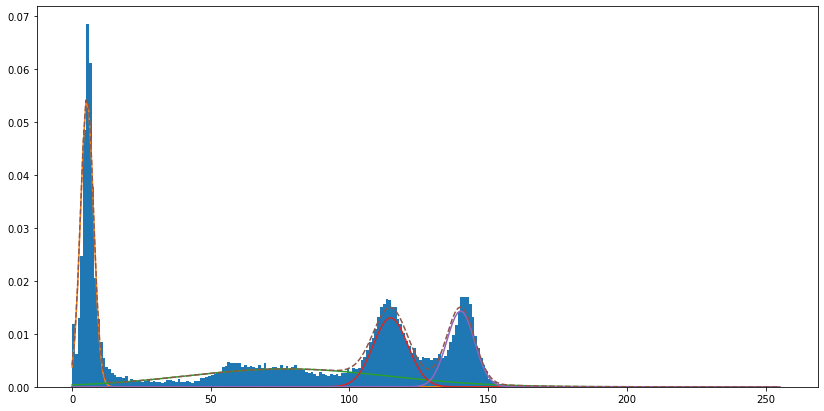

In [5]:
Ir=I.ravel()
Ir=Ir.astype(np.float64)
x=np.linspace(0,255,256)
lon=len(Ir)
pdf=np.zeros((nm,lon))
x=np.linspace(0,255,256)
fig = []
ax = []
fig1=plt.figure(figsize = (14,7))
b= plt.hist(Ir,256,[0,256],density=True)
for i in range(nm):
    plt.plot(x,phi[i]*normal_dist(x , med[i] , std[i]))
plt.show()

for ite in range(20):
    gt=0
    fig.append(plt.figure(ite,figsize = (14,7)))
    ax.append(fig[ite].gca())
    ax[ite].hist(I.ravel(),256,[0,256],density=True)
    
    for model in range(nm):
        pdf[model,:]=phi[model]*normal_dist(Ir , med[model] , std[model])
    pdft=np.sum(pdf,axis=0)
    gamma=pdf/pdft
    for model in range(nm):
        suma=np.sum(gamma[model,:])
        phi[model]=suma/lon
        med[model]=np.dot(gamma[model,:],Ir)/suma
        std[model]=np.sqrt(np.dot(gamma[model,:],(Ir-med[model])**2)/suma)
        f=normal_dist(x , med[model] , std[model]);
        f=f/np.sum(f)
        g=phi[model]*f
        gt=g+gt;
        plt.plot(x,g)
    plt.plot(x,gt,'--')


[0.31587699 0.30222129 0.2032847  0.17861702]


<function matplotlib.pyplot.show(close=None, block=None)>

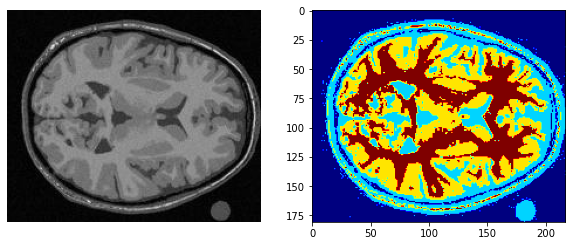

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax[0].imshow(I, cmap='gray',vmin=0,vmax=255)
ax[0].axis('off')
print(phi)
for model in range(nm):
    pdf[model,:]=phi[model]*normal_dist(Ir , med[model] , std[model])
Irt=np.argmax(pdf,axis=0)
Irt=np.reshape(Irt, (nf, nc))   
ax[1].imshow(Irt,cmap='jet')
plt.show